# Viewing nD-data
Since version 0.10.0 stackview comes with support for viewing image data that has more than 3 dimensions.

In [1]:
import stackview
from skimage.io import imread

We use the mitosis example dataset from ImageJ.

In [2]:
image = imread("data/mitosis.tif")
image = image[...,40:120].swapaxes(-1,-2)
image.shape

(51, 5, 2, 80, 196)

This image has 5 dimensions. The meaning of these dimensions must be taken from the meta-data or guessed. In our case it is Time, Z, Channel, Y and X. Stackview will automatically add sliders for all but the last two dimensions.

In [3]:
stackview.slice(image)

In the view above, you can only inspect a single channel. In order to blend channels over each other, you need to use `stackview.switch` with `toggleable=True`. As the channel dimension cannot be determined automatically, you need to extract the channels yourself. It is also recommended to choose colormaps, to make the channels distinguishable.

In ImageJ-language, we call this a composite image.

In [4]:
stackview.switch(images=[
                    image[:,:,0], # channel 1
                    image[:,:,1]  # channel 2
                 ], 
                 colormap=[
                     "pure_green", 
                     "pure_magenta"
                 ], 
                 toggleable=True,
                 zoom_factor=2)

Static viewers such as `imshow` and `insight` work as well, but might be less informative when used on n-dimensional data as the visualize a maximum intensity project over all dimensions but the last two.

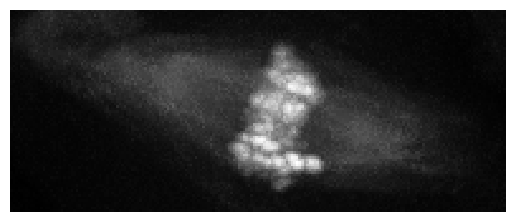

In [5]:
stackview.imshow(image)

StackViewNDArray([[[[[2259, 1794, 1952, ..., 1679, 2092, 2014],
                     [1934, 1908, 2447, ..., 1694, 2126, 1928],
                     [2095, 2116, 2004, ..., 1790, 1701, 1733],
                     ...,
                     [1833, 1777, 2030, ..., 1990, 1910, 2135],
                     [2181, 1797, 1903, ..., 2526, 1886, 2081],
                     [1993, 2063, 2012, ..., 1881, 1897, 2308]],

                    [[2903, 2296, 2398, ..., 3491, 3636, 3339],
                     [2737, 2564, 2044, ..., 3682, 3536, 3559],
                     [2394, 2678, 2079, ..., 3882, 4043, 3640],
                     ...,
                     [2140, 2313, 2555, ..., 2148, 2030, 2333],
                     [2248, 2189, 2206, ..., 2026, 1800, 2802],
                     [2282, 2192, 2566, ..., 2709, 2705, 2870]]],


                   [[[2617, 2209, 1918, ..., 1876, 1740, 1711],
                     [2056, 2337, 2288, ..., 2015, 1679, 1760],
                     [1920, 2195, 2062, ..., 1767, 1775, 1782],
                     ...,
                     [2240, 2218, 2037, ..., 1991, 2084, 2254],
                     [2090, 1880, 1814, ..., 2163, 2090, 2056],
                     [1807, 2029, 1831, ..., 2109, 2498, 1957]],

                    [[3410, 3465, 2989, ..., 4325, 3047, 4280],
                     [3313, 3679, 2410, ..., 4232, 4413, 3567],
                     [2864, 3360, 2566, ..., 3885, 4454, 3357],
                     ...,
                     [2486, 2140, 1847, ..., 2973, 2596, 3204],
                     [2529, 2348, 2362, ..., 2896, 2648, 2694],
                     [2271, 2818, 2212, ..., 3013, 3110, 2939]]],


                   [[[2354, 2539, 2544, ..., 1835, 2049, 1679],
                     [2812, 2086, 1938, ..., 1722, 2123, 2119],
                     [2022, 2103, 2256, ..., 1728, 1680, 1784],
                     ...,
                     [2170, 1825, 1677, ..., 2697, 2267, 2057],
                     [2109, 2011, 1679, ..., 2033, 2123, 1951],
                     [1908, 1847, 1880, ..., 2271, 2668, 2073]],

                    [[2922, 3056, 3130, ..., 2000, 2018, 2637],
                     [2524, 2458, 2535, ..., 2195, 2192, 2496],
                     [2635, 2876, 2679, ..., 2294, 2643, 2617],
                     ...,
                     [2009, 2693, 1922, ..., 2772, 1935, 2868],
                     [2330, 1775, 2175, ..., 2592, 3117, 2800],
                     [2131, 2110, 1875, ..., 2616, 2785, 3280]]],


                   [[[1956, 2118, 1798, ..., 1716, 1821, 1892],
                     [1864, 1810, 1903, ..., 1697, 1641, 1842],
                     [1877, 2569, 2191, ..., 1735, 1833, 1881],
                     ...,
                     [2325, 2119, 2184, ..., 1964, 1944, 2045],
                     [2031, 2017, 1876, ..., 2084, 2382, 1827],
                     [2035, 2011, 1835, ..., 2074, 1750, 1751]],

                    [[2080, 1974, 2830, ..., 1779, 2081, 2148],
                     [2104, 2097, 3199, ..., 2053, 1881, 2114],
                     [2088, 2498, 2559, ..., 2199, 2065, 2525],
                     ...,
                     [2034, 2052, 2147, ..., 2131, 2025, 2023],
                     [2134, 2337, 2262, ..., 2049, 2414, 2396],
                     [2414, 2109, 2107, ..., 2026, 1913, 2254]]],


                   [[[1866, 1743, 1880, ..., 2013, 1849, 1739],
                     [1836, 1783, 2110, ..., 1869, 2070, 1767],
                     [2312, 1699, 1797, ..., 1617, 1691, 1908],
                     ...,
                     [2091, 1837, 1941, ..., 2038, 2092, 1646],
                     [1716, 1717, 1817, ..., 1916, 1909, 1803],
                     [1997, 2085, 1829, ..., 1655, 1808, 2312]],

                    [[2662, 1982, 2628, ..., 1970, 2032, 2122],
                     [2229, 2414, 1993, ..., 2257, 1827, 2158],
                     [2181, 2098, 2357, ..., 2163, 2073, 1917],
                     ...,
                     [2068, 2290, 1983, ..., 2168, 2157, 2109],
  
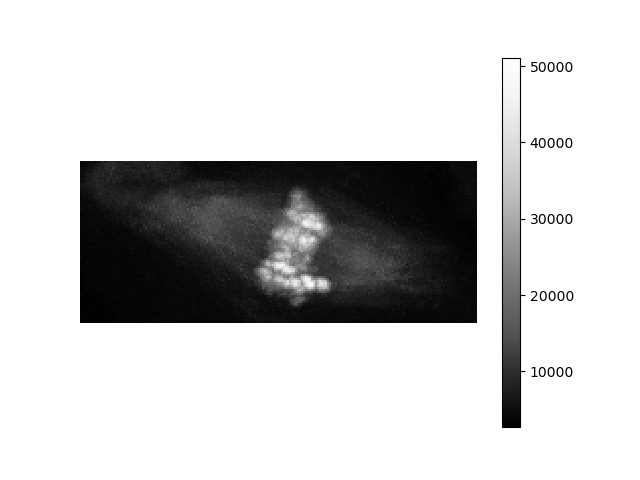
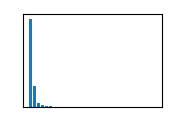

In [6]:
stackview.insight(image)